# MURCHIE85 TWITTER PROCESSING (TOPIC = <font color=red >#SexStrike</font> )


## AUTOMATED RESEARCH SUMMARY
    

![image](https://i.ytimg.com/vi/VCJfT9CTuds/maxresdefault.jpg)

<br>


<div class="alert alert-block alert-info">
<b> This repo is for pulling metrics on a given keyword or hashtag and performs a series of reporting and analysis.</b>
</div>


<br>


   


![image](BIO.png)

*The term that looks like ☐☐ is unicode USA flag*

<br>
<br>

<font size="3">
The majority of tweeters on this topic describe themselves in their Bio with **'MAGA'** , **'TRUMP'**, **'GOD'**  and **'PROUD'**. <br>
Related terms such as **Feminist**, **Feminism** and **LGBTQ** do not rank in the top 20 terms.
</font>


The top most popular words tweeted are :


- **#SexStrike**
- **women**
- **@Alyssa_Milano**
- **Alyssa**
- **sex**
- **her**
- **abortion**
- **control**
- **men**
- **unwanted**


![image](TWEETS.png)
    
    
### SENTIMENT ANALYSIS
VIEWS WERE : **SUBJECTIVE**  (40%) & **NEGATIVELY-SUBJECTIVE** (30%) **OBJECTIVE** (30%)

### TWEET SAMPLE 

Random value picked from array: 


<div class="alert alert-block alert-info">
<b>18 May 2019:</b> @Alyssa_Milano @Alyssa_Milano Funny how we didn't hear a peep from you when our sisters are getting murdered
</div>


### MOST RETWEETED

Technically the most popular tweet (note, this is not always the source of the hashtag)

<div class="alert alert-block alert-danger">
<font size="3"><b>@Alyssa_Milano</b> Our reproductive rights are being erased.

Until women have legal control over our own bodies we just cannot risk pregnancy. 

JOIN ME by not having sex until we get bodily autonomy back.

I’m calling for a #SexStrike. Pass it on.</font>
</div>



### ANALYSIS CRITIQUE

<br>
<font size="3">

All the tweets & replies relating to #SexStrike were mined, this includes over 100,000 tweets in May 2009. The most frequently tweeted terms, match the #SexStrike theme, yet they are (over 90%) tweeted by people who do not describe themselves with terms such as **Feminist**, **Feminism** and **LGBTQ** . Additionally the combined Sentiment analysis shows the majority of tweets to be Subjective (i.e. opinion based) with a considerable 30% being flagged as **NEGATIVELY-SUBJECTIVE**. 

</font>

<br><br>

<font size="3">

It can be seen when working through the tweet_array, this analysis requires factoring in upstream influences. Due to the close connection with #Alabama and #AbortionBan (which is cited frequently) - this influences the otheral tweet sentiment and the three hashtags are not mutually exclusive. However when cross referencing with analytics from #Alabama the tweet Bio and Tweet content are 60-80% the same terms. 

</font>

<br>

<font size="3">
No information was removed or specially selected for apart from gramatically netural terms listed in code below i.e. `delx['THE']` removed all `the` terms from word count. There are limitations to this research covered in technical detail below, but the key issue being this report was taken after the hashtag stopped trending, it peaked at 500 tweets per minute - thus whilst this data is the complete overview, it did not show how opinions changed over time. I.e. were there changes in objectivity post completion of tweet threads.

</font>

<br>


### CONCLUSION & EXTERNAL ANALYSIS

*This is my (Adam McMurchie's) opinion on the data from the tweets, it serves as no objective truth.Since the tweets themselves are a mixture of fact & opinion. 

<br>
<font size="3">
The **#SexStrike** did not appear to achieve it's direct goals, as the target audience were not reached, to be specific the target audience failed to properly carry momentum by not using # prefix in retweets or replies. 
<br>
This meant that twitter daily newsfeed did not flag to topic as trending long, only the Author (Milano) had kept the momentum afloat by number of retweets. Whilst the media still reports the topic as trending, it is not, trend duration lasted approximately 13 days. 
<br>

The cause was further hampered by it's attempt to pre-empt the abortion-ban, which meant it pulled in significant politically charged tweets. As a result the majority of the noise is from people with Republican and right leaning Bios which impacted the overall sentiment of the tweets. 

<br><br>

**RECOMMENDATIONS** it is clear that to progress a tweeting trend the more a #hashtag is used, the more likely that topic is to trend. Additionally, topics that have direct link to political topics may be at risk from hijacking or reduced positive sentiment. 
</font>

<br>

# TECHNICAL WALKTHROUGH 


## OVERVIEW

**SKIP TO BOTTOM FOR FULL RESULTS & GRAPH BREAKDOWN **

- Pulls live tweets from all over twitter 
- Imports Tweepy Library 
- Consumes Twitter API 
- Desgined to be keyword driven
- All metrics can be captured
- No limit on Runtime (best to terminate when you want)

## Limitations & info
1. LOCATION filter is tricky
2. Streaming connects to the “public streams” (all public data) 
3. This is data provided by the Twitter API which accesses their database, the maintenence of DB and thus data quality is managed by Twitter

Example of parameter setting done in stream filter 

```
stream.filter(follow=["2211149702"])
```


### AUTHOR : ADAM MCMURCHIE 

![image](https://s3.amazonaws.com/re-work-production/avatars/1104/original.png?1485507466)

Github [here](https://github.com/murchie85)  

Mysite [here](https://murchie85.github.io/)

# AUTHENTICATION

You will need to change f variable to point to your credentials file, I save mines in a text file and split the comma. Not uploaded to this repo obviously.

In [1]:
import datetime


f = open("../donotgit/access.txt", "r")
keys = f.read()
f.close()
keys  = keys.split(',')
#print("Access Keys are : " + str(keys))
ACCESS_TOKEN = keys[0]
ACCESS_SECRET = keys[1]


f = open("../donotgit/consumer.txt", "r")
keys = f.read()
keys  = keys.split(',')
#print("Consumer Keys are : " + str(keys))
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]


# PULLING DOWN THE DATA 

This is where the magic happens, api authentication is set up, tweepy library is imported for the work and a class allow us to pull live data. This is appended to array for processing later. 

If you want to change the parameters, edit the following line:  

```
stream.filter(track=["SexStrike"],languages=["en"])
```

*NOTE* -   this will just keep running until you force terminate, i haven't added in a terminate loop yet.

In [3]:
from ipywidgets import IntProgress
from IPython.display import display
import time

import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy

# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

status_array = []
LOOP_COUNT = 0
max_count = 10000


# Search for 10 most recent tweets about "#sexstrike"
tweets = tweepy.Cursor(api.search, q='SexStrike', count=int(max_count))

# TRACK PROGRESS
f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar


print('Pulling down data.....')                    
for tweet in tweets.items(int(max_count)):
    f.value+=1
    time.sleep(.1)
    status_array.append(tweet._json)




print('Processing complete')

#-------------------STREAMING SWITCHED OFF AS NO LONGER TRENDING, DATA CAPTURED HISTORICALLY NOW -------------
"""

f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar



class StreamListener(tweepy.StreamListener):
    tweet_number=0   # class variable
    


    def on_status(self, status):
        self.max_tweets=max_count # max number of tweets
        self.tweet_number+=1   
        f.value += 1 # signal to increment the progress bar
        time.sleep(.1)
        status_array.append(status._json)

        if self.tweet_number>=self.max_tweets:
            sys.exit('PROCESSING COMPLETE : '+str(self.max_tweets)+' tweets processed.')

        
    def on_error(self, status_code):
        if status_code == 420:
            return False

stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)

print('Pulling down data.....')
stream.filter(track=["#Alabama"],languages=["en"])

"""

Pulling down data.....
Processing complete


'\n\nf = IntProgress(min=0, max=max_count) # instantiate the bar\ndisplay(f) # display the bar\n\n\n\nclass StreamListener(tweepy.StreamListener):\n    tweet_number=0   # class variable\n    \n\n\n    def on_status(self, status):\n        self.max_tweets=max_count # max number of tweets\n        self.tweet_number+=1   \n        f.value += 1 # signal to increment the progress bar\n        time.sleep(.1)\n        status_array.append(status._json)\n\n        if self.tweet_number>=self.max_tweets:\n            sys.exit(\'PROCESSING COMPLETE : \'+str(self.max_tweets)+\' tweets processed.\')\n\n        \n    def on_error(self, status_code):\n        if status_code == 420:\n            return False\n\nstream_listener = StreamListener()\nstream = tweepy.Stream(auth=api.auth, listener=stream_listener)\n\nprint(\'Pulling down data.....\')\nstream.filter(track=["#Alabama"],languages=["en"])\n\n'

# PRINT AND SAVE DATA

This section allows me to pull the recently mined data into a file in raw format incase i need it later.

In [3]:
currentDT = datetime.datetime.now()
filename = "data/streamout-" + str(currentDT) + ".txt"

print(filename)

with open(filename, 'w') as f:
    for item in status_array:
        f.write("%s\n" % item)
f.close()

data/streamout-2019-05-18 13:27:04.247675.txt


# STREAM METADATA

In [66]:
print('Number of records')
print(len(status_array))
print('')
print('The data keys are : ')
print(status_array[0].keys())
print('')
print('An example element looks like: ')
print(status_array[0])

Number of records
10000

The data keys are : 
dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

An example element looks like: 
{'created_at': 'Sat May 18 12:51:07 +0000 2019', 'id': 1129731138107432960, 'id_str': '1129731138107432960', 'text': '@Alyssa_Milano So you are pitting women against their own children?  And you know that pregnancy isn\'t "forced" (in… https://t.co/QtVZbZIPnO', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Alyssa_Milano', 'name': 'Alyssa Milano', 'id': 26642006, 'id_str': '26642006', 'indices': [0, 14]}], 'urls': [{'url': 'https://t.co/QtVZbZIPnO', 'expanded_url': 'https://twitter.com/i/web/st

# REPORT GENERATION

In [ ]:
# WRITE OUT FULL REPORT
reportfile = "reports/printout-"+ str(currentDT) + ".txt"
descriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"
tweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"

REPORTCOUNT = 0
with open(reportfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('------------------------------\n')
        f.write(status_array[y]['created_at'])
        f.write('------------------------------\n')
        f.write(status_array[y]['user']['name'])
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['location']))
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('--------------REPLY COUNT----------------\n|')
        f.write(str(status_array[y]['reply_count']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------RETWEETED?----------------\n')
        f.write(str(status_array[y]['retweeted']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------FAVOURITED----------------\n')
        f.write(str(status_array[y]['favorited']))
        f.write('--------------FAVOURITE COUNT----------------\n')
        f.write(str(status_array[y]['favorite_count']))
        f.write('\n')
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    
    
# WRITE OUT ONLY DESCRIPTION
    
REPORTCOUNT = 0
with open(descriptionfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    

# WRITE OUT ONLY TWEET
    
REPORTCOUNT = 0
with open(tweetfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()

    
    
    
    
    
print('=========================SAMPLE OUTPUT================================')
print('************************************************************')
print(status_array[0]['text'])
print('------------------------------')
print(status_array[0]['created_at'])
print('------------------------------')
print(status_array[0]['user']['name'])
print('------------------------------')
print(status_array[0]['user']['location'])
print('------------------------------')
print(status_array[0]['user']['description'])
print('--------------REPLY COUNT----------------')
print(status_array[0]['reply_count'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------RETWEETED?----------------') 
print(status_array[0]['retweeted'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------FAVOURITED----------------')
print(status_array[0]['favorited'])
print('--------------FAVOURITE COUNT----------------')
print(status_array[0]['favorite_count'])



## USER DESCRIPTION NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency 

```
WORDONE=''
WORDTWO=''
WORDTHREE=''
```

In [6]:

WORDONE='#MAGA'
WORDTWO='me'
WORDTHREE='feminist'

WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 

linecount = 0
APPENDED_DESCRIPTION = ""



for x in range(0, len(status_array)):
    linecount = linecount + 1
    description = status_array[x]['user']['description']
    APPENDED_DESCRIPTION = APPENDED_DESCRIPTION + str(description)
    
    
    if str(description).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1

    if str(description).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1

    if str(description).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT))
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT))
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT))
print('Total Number of Records: ' + str(linecount))    

Total count of words - #MAGA :981
Total count of words - me :3110
Total count of words - feminist :64
Total Number of Records: 10000


In [27]:
from collections import Counter, OrderedDict
DISC = APPENDED_DESCRIPTION.split()
x = Counter(DISC)
del x['⠀'],x['what'],x['no'],x['one'],x['.'],x['was'],x['THE'],x['now'],x['more'],x['if'],x['their'],x['or'],x['love'],x['Love'],x['things'],x["don't"], x["and"], x["the"], x["of"],x["to"], x["a"], x["I"], x["&"], x["in"], x["for"], x["my"], x["is"], x["the"], x["are"], x["you"], x["on"]
del x["with"], x['We'],x['we'],x["not"], x["but"], x["be"],x['can'], x["The"],x['out'], x["No"], x["who"], x["|"], x["about"], x["that"], x["your"], x["•"], x['from'], x['-'], x['it'], x['am'], x[','], x['like'],x['just']
del x['It'],x["I'm"],x["I’m"], x['A'],x['our'],x['/'],x['-'],x['this'],x['have'],x['by'],x['an'],x['going'],x['they'],x['having'],x['all'],x['at'],x['good'],x['do'],x['love'],x['as'],x['My'],x['i'],x['always'],x['me'],x['get'],x['will'],x['so'],x['can',x['⠀']]


      
            
top_bio_desc = OrderedDict(x.most_common(20))
print(top_bio_desc)


OrderedDict([('#MAGA', 567), ('Trump', 289), ('🇺🇸', 218), ('#2A', 213), ('Proud', 181), ('God', 174), ('American', 171), ('#KAG', 161), ('follow', 127), ('people', 127), ('life', 125), ('#Resist', 123), ('Conservative', 122), ('only', 120), ('up', 116), ('political', 107), ('#WWG1WGA', 106), ('want', 105), ('proud', 101), ('time', 100)])


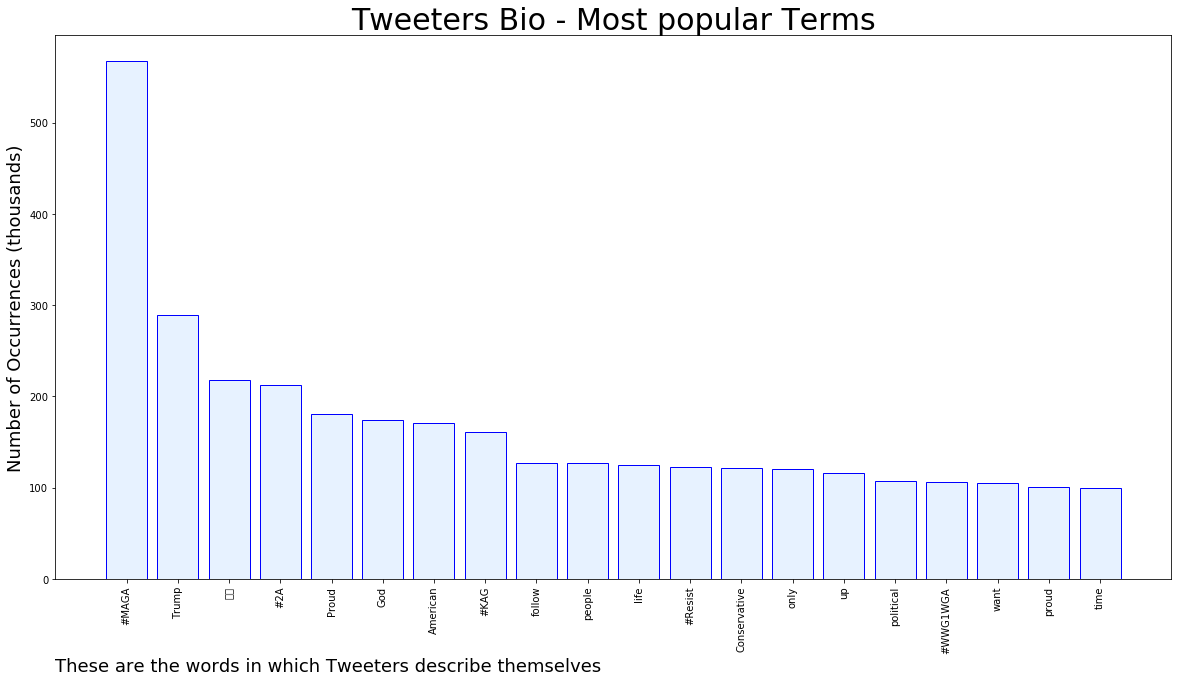

In [58]:
import matplotlib.pyplot as plt

D = top_bio_desc

plt.bar(range(len(D)), list(D.values()), align='center', color=(0.1, 0.5, 1, 0.1),  edgecolor='blue')

plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.title("Tweeters Bio - Most popular Terms", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig("BIO", bbox_inches="tight")
plt.show()

## TWEET NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency 

```
WORDONE=''
WORDTWO=''
WORDTHREE=''
```

In [13]:
WORDONE='sex'
WORDTWO='feminist'
WORDTHREE='women'

WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 
linecount = 0
APPENDED_TEXT = ""


for x in range(0, len(status_array)):
    linecount = linecount + 1
    text = status_array[x]['text']
    APPENDED_TEXT = APPENDED_TEXT + str(text)
    
    
    if str(text).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1

    if str(text).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1

    if str(text).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT))
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT))
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT))
print('Total Number of Records: ' + str(linecount))


Total count of words - sex :3148
Total count of words - feminist :247
Total count of words - women :2085
Total Number of Records: 10000


In [14]:
len(APPENDED_TEXT)

1248898

In [18]:
from collections import Counter, OrderedDict
DISC = APPENDED_TEXT.split()
x = Counter(DISC)
del x['⠀'],x['what'],x['what'],x['If'],x['can’t'],x['.'],x['was'],x['THE'],x['now'],x['more'],x['if'],x['their'],x['or'],x['love'],x['Love'],x['things'],x["don't"], x["and"], x["the"], x["of"],x["to"], x["a"], x["I"], x["&"], x["in"], x["for"], x["my"], x["is"], x["the"], x["are"], x["you"], x["on"]
del x["with"], x['We'],x['we'],x["not"], x["but"], x["be"],x['can'], x["The"],x['out'], x["No"], x["who"], x["|"], x["about"], x["that"], x["your"], x["•"], x['from'], x['-'], x['it'], x['am'], x[','], x['like'],x['just']
del x['It'],x["I'm"],x["I’m"], x['A'],x['our'],x['/'],x['-'],x['this'],x['have'],x['by'],x['an'],x['going'],x['they'],x['having'],x['all'],x['at'],x['good'],x['do'],x['love'],x['as'],x['My'],x['i'],x['always'],x['me'],x['get'],x['will'],x['so'],x['can',x['⠀']]

    

top_tweets = OrderedDict(x.most_common(20))
print(top_tweets)


OrderedDict([('#SexStrike', 3339), ('women', 1672), ('@Alyssa_Milano', 1148), ('#sexstrike', 1083), ('Alyssa', 893), ('sex', 862), ('her', 845), ('abortion', 804), ('control', 624), ('need', 609), ('take', 586), ('has', 556), ('no', 548), ('Women', 482), ('Milano', 472), ('how', 467), ('men', 466), ('unwanted', 463), ('birth', 451), ('those', 448)])


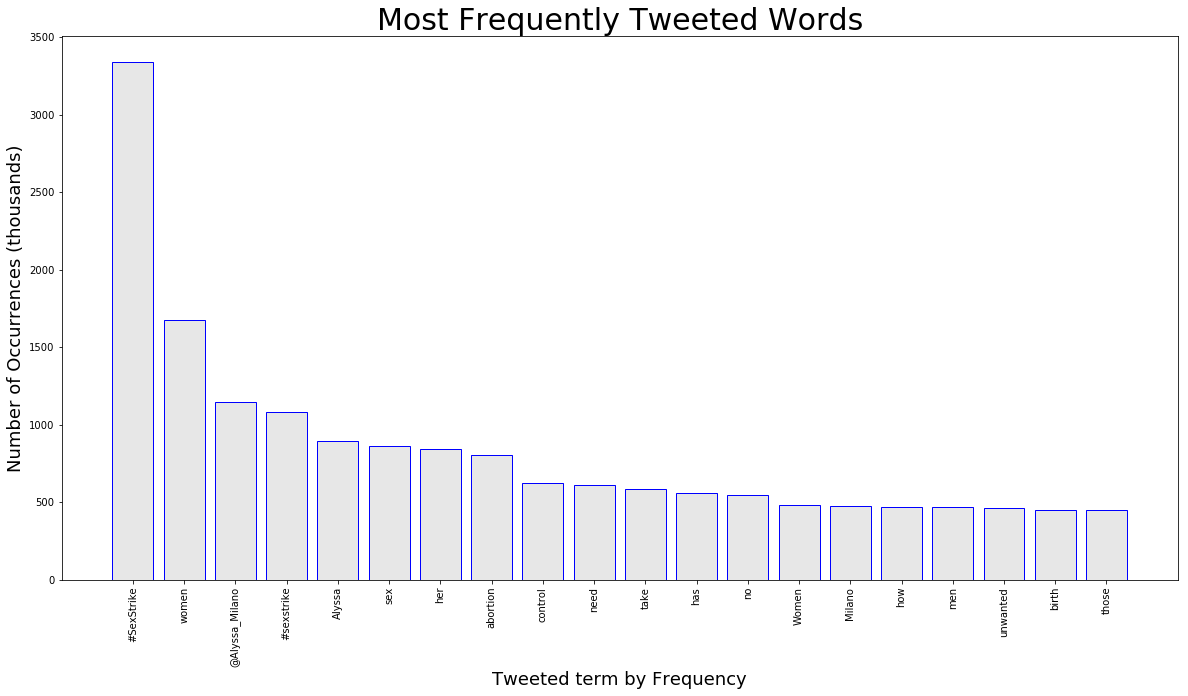

In [57]:
import matplotlib.pyplot as plt

E = top_tweets

plt.bar(range(len(E)), list(E.values()), align='center', color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

plt.xticks(range(len(E)), list(E.keys()), rotation='vertical')
plt.title("Most Frequently Tweeted Words", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
plt.xlabel('Tweeted term by Frequency', fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig("TWEETS", bbox_inches="tight")
plt.show()


# SENTIMENT ANALYSIS 

The sentiment property returns a named tuple of the form Sentiment (polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

# Now the Theory
Thanks to Siraj Raval and freecode camp for the sample here

TextBlob
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

A textblob can be created in the following way (example, and not part of the original code):

example = TextBlob("Python is a high-level, general-purpose programming language.")
And tokenization can be performed by the following methods:
words: returns the words of text

usage:

example.words
sentences: returns the sentences of text

usage:

example.sentences


In [60]:
from textblob import TextBlob

In [61]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [62]:
public_tweets = api.search('#SexStrike')

In [63]:
objective_tweet=0
subjective_tweet=0
negitively_subjective=0
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       subjective_tweet = subjective_tweet + 1
       print('Subjective')
    elif analysis.sentiment[0]<0:
       negitively_subjective = negitively_subjective  + 1
       print('Negatively subjective')
    else:
       objective_tweet = objective_tweet + 1
       print('objective')
    print('\n')
    
print('objective_tweets : '+str(objective_tweet))
print('subjective_tweets : '+str(subjective_tweet))
print('negitively_subjective tweets: '+str(negitively_subjective))

Thank you for the #SexStrike, Senator! Keep it going! https://t.co/MP5G8E72za
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @415holgate: This! 👇🏾👇🏾👇🏾👇🏿👇🏿Be sure and read this. #TreatGunOwnersLikeWomen #NRARussia #GOPRussia #SexStrike https://t.co/vdaYW0VfUL
Sentiment(polarity=0.5, subjectivity=0.8888888888888888)
Subjective


RT @davidwebbshow: If ⁦@franlebowitz⁩ is the option I’ll take the #SexStrike. ⁦@Alyssa_Milano⁩  https://t.co/7N8RTxkCiZ
Sentiment(polarity=0.0, subjectivity=0.0)
objective


@TRHLofficial Did the lesbians go on a #sexstrike, too?    Just curious.
Sentiment(polarity=-0.1, subjectivity=1.0)
Negatively subjective


RT @denise_artist: If women can’t prevent unwanted pregnancies while having sex—if they need to resort to abortion as birth control —then y…
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @davidwebbshow: If ⁦@franlebowitz⁩ is the option I’ll take the #SexStrike. ⁦@Alyssa_Milano⁩  https://t.co/7N8RTxkCiZ
Sentiment(polarity=0.0, subjecti

In [67]:
len(status_array)
print('Number of records')
print(len(status_array))
print('')
print('The data keys are : ')
print(status_array[0].keys())
print('')
print('An example element looks like: ')
print(status_array[0])

Number of records
10000

The data keys are : 
dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

An example element looks like: 
{'created_at': 'Sat May 18 12:51:07 +0000 2019', 'id': 1129731138107432960, 'id_str': '1129731138107432960', 'text': '@Alyssa_Milano So you are pitting women against their own children?  And you know that pregnancy isn\'t "forced" (in… https://t.co/QtVZbZIPnO', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Alyssa_Milano', 'name': 'Alyssa Milano', 'id': 26642006, 'id_str': '26642006', 'indices': [0, 14]}], 'urls': [{'url': 'https://t.co/QtVZbZIPnO', 'expanded_url': 'https://twitter.com/i/web/st

In [136]:
retweet_array= []
for current in range(0, len(status_array)):
    retweet_array.append(status_array[current]['retweet_count'])
    
print('length of retweeted array: ' + str(len(retweet_array)))
most_retweeted = max(retweet_array)
print("most number of retweets: " + str(most_retweeted) + " at index " + str(retweet_array.index(max(retweet_array))))
print('The person who tweeted it was ' + str(status_array[retweet_array.index(max(retweet_array))]['user']['screen_name']))
print('Their screename is" ' + str(status_array[retweet_array.index(max(retweet_array))]['user']['name']))
print('There tweet was : ')
print(status_array[retweet_array.index(max(retweet_array))]['text'])

length of retweeted array: 10000
most number of retweets: 15402 at index 5405
The person who tweeted it was jillrose999
Their screename is" Jill
There tweet was : 
RT @Alyssa_Milano: Our reproductive rights are being erased.

Until women have legal control over our own bodies we just cannot risk pregna…


In [106]:
status_array[retweet_array.index(max(retweet_array))]['text']

'RT @Alyssa_Milano: Our reproductive rights are being erased.\n\nUntil women have legal control over our own bodies we just cannot risk pregna…'

In [102]:
status_array[2]['text'])

@Alyssa_Milano @Alyssa_Milano Funny how we didn't hear a peep from you when our sisters are getting murdered, yet y… https://t.co/bjFQfULke7
